# Recession Tweets Sentiment Analysis 

International Monetary Funds (IMF) announced that the global growth is expected to slow down from 3.4% to 2.9% in 2023. This is due to the fight against inflation and Russia's war in Ukraine. Although the projection is slightly less gloomy that October forecast, growth will remain weak and is expected to bounce in 2024. This slow growth means that many countries are prone to go into a recession period. 
<br><br>
<i>"We expect one third of the world economy to be in recession," -Ms Georgieva (Managing Director of the International Monetary Fund)</i> 
<br><br>
Indonesia as one of emerging countries is also in the risk of recession. Indonesia's economy is projected to grow slower than the last year's growth. Indonesia Central Bank projected 4.5% to 5.3% growth in 2023, this growth is slower than the last year's Q3 growth that is 5.72%. This forecast is similar to Indonesia National Recearch Agency that forecast 4.9% to 5.2% growth, and similar to IMF's forecast that is projecting a growth of 5.3%. 
<br><br>
Indonesia's economy has stumbled during 2020 as the GDP growth falls down to -2.9% (as shown in the figure below), and has recovering since then. Hence maintaining the growth of GDP becomes important to the government. Currently, as per 19 January 2023, Indonesia Central Bank increase the interest rate to 5.75% to surpress inflation and reflects the optimism against recession.
<br><br>
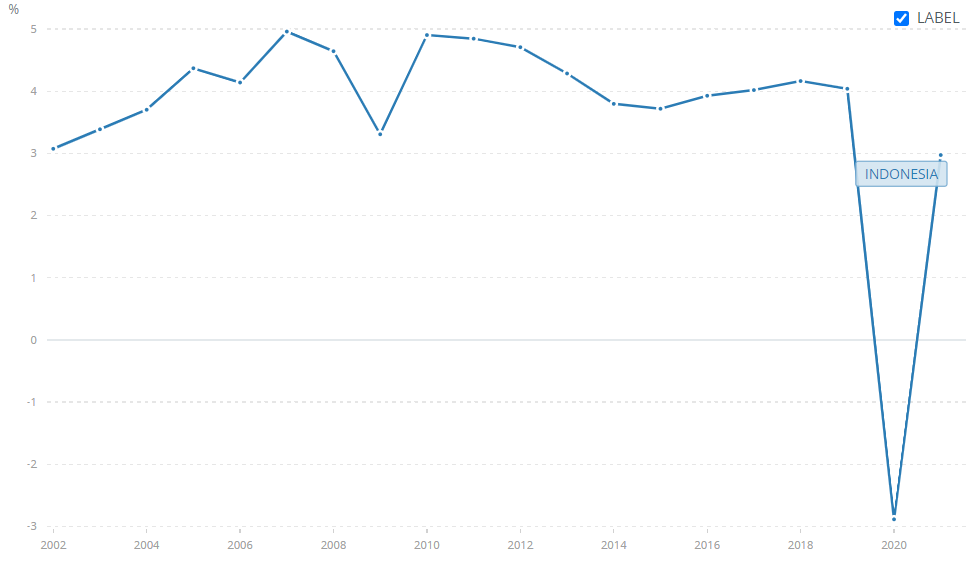
<center><i>Indonesia GDP Growth (Source : https://data.worldbank.org)</i></center>
<br><br>
Although the monetary policy was already settled, it is important for the government to know public opinion regarding the economy condition. By knowing the public opinion, government could act quickly and evaluate its policies if needed. 
<br><br> 
In thi notebook I will analyze sentiment analysis of indonesia's recession topic on twitter data. This data was extracted on 3 February 2023 using twitter API. 

In [23]:
# !pip install nlp-id

In [24]:
import re
import nltk
import spacy
import numpy as np
import pandas as pd 
import seaborn as sns 
# from time import sleep
# from textblob import TextBlob
import matplotlib.pyplot as plt 
from nlp_id.lemmatizer import Lemmatizer 
from spacy.lang.id.stop_words import STOP_WORDS
# from wordcloud import WordCloud
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*',' ',text)
    text = re.sub('\$[a-zA-z0-9]*',' ',text)
    text = re.sub('\@[a-zA-z0-9]*',' ',text)
    text = re.sub('&',' ',text)
    if text[0:5] == 'rt  :':
        text = text[5:]
    return text

def tokenize(s):
    emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
    regex_str = []
    regex_str.append(emoticons_str)
    regex_str.append(r'<[^>]+>')# HTML tags
    regex_str.append(r'(?:@[\w_]+)')# @-mentions
    regex_str.append(r'(?:&[\w_]+)')
    regex_str.append(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)") # hash-tags
    regex_str.append(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+') # URLs
    regex_str.append(r'(?:(?:\d+,?)+(?:\.?\d+)?)') # numbers
    regex_str.append(r"(?:[a-z][a-z'\-_]+[a-z])") # words with - and '
    regex_str.append(r'(?:[\w_]+)') # other words
    regex_str.append(r'(?:\S)') # anything else
    tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
    tokens = tokens_re.findall(s)
    return tokens

Let's take a look on the recession tweet dataset

## 1. Dataset

In [26]:
data = pd.read_csv("../input/indonesia-recession-tweet/masked_indonesia_recession_tweet.csv", index_col=0)
data = data[["tweet"]]
data.info()
print("")
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2137
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2138 non-null   object
dtypes: object(1)
memory usage: 33.4+ KB



,tweet
0,RT @xskybls: @Askrlfess Walaupun Indonesia men...
1,Resesi mengancam negara-negara di dunia. Meres...
2,"RT @jokowi: Jumlah penduduk, yang berkualitas,..."
3,"RT @killthedj: Kalo resesi terjadi, ya hanya m..."
4,China Akui Anak di Luar Nikah gegara Resesi Se...


## 2. Data Preprocessing

### 2.1 Remove link and username

In [27]:
data['tweet_clean'] = data['tweet'].apply(clean)
data.head()

,tweet,tweet_clean
0,RT @xskybls: @Askrlfess Walaupun Indonesia men...,walaupun indonesia menyusul kayanya juga ga...
1,Resesi mengancam negara-negara di dunia. Meres...,resesi mengancam negara-negara di dunia. meres...
2,"RT @jokowi: Jumlah penduduk, yang berkualitas,...","jumlah penduduk, yang berkualitas, sekarang m..."
3,"RT @killthedj: Kalo resesi terjadi, ya hanya m...","kalo resesi terjadi, ya hanya masyarakat desa..."
4,China Akui Anak di Luar Nikah gegara Resesi Se...,china akui anak di luar nikah gegara resesi se...


### 2.2 Regex Tokenizing

In [28]:
data["tweet_tokenized"] = data["tweet_clean"].apply(tokenize)
data.head()

,tweet,tweet_clean,tweet_tokenized
0,RT @xskybls: @Askrlfess Walaupun Indonesia men...,walaupun indonesia menyusul kayanya juga ga...,"[walaupun, indonesia, menyusul, kayanya, juga,..."
1,Resesi mengancam negara-negara di dunia. Meres...,resesi mengancam negara-negara di dunia. meres...,"[resesi, mengancam, negara-negara, di, dunia, ..."
2,"RT @jokowi: Jumlah penduduk, yang berkualitas,...","jumlah penduduk, yang berkualitas, sekarang m...","[jumlah, penduduk, ,, yang, berkualitas, ,, se..."
3,"RT @killthedj: Kalo resesi terjadi, ya hanya m...","kalo resesi terjadi, ya hanya masyarakat desa...","[kalo, resesi, terjadi, ,, ya, hanya, masyarak..."
4,China Akui Anak di Luar Nikah gegara Resesi Se...,china akui anak di luar nikah gegara resesi se...,"[china, akui, anak, di, luar, nikah, gegara, r..."


### 2.3 Stopwords Removal

In [29]:
nlp = spacy.blank("id")
data["stopword_removal"] = np.nan
for i in range(len(data)):
    wordlist = data.tweet_tokenized.iloc[i]
    result = []
    for word in wordlist:
        doc = nlp(word)
        for token in doc:
            if token.is_stop == False:
                if word not in ['rt', 'via', '…','•','“','',',']:
                    result.append(token)
    data.stopword_removal.iloc[i] = result

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
data.head()

,tweet,tweet_clean,tweet_tokenized,stopword_removal
0,RT @xskybls: @Askrlfess Walaupun Indonesia men...,walaupun indonesia menyusul kayanya juga ga...,"[walaupun, indonesia, menyusul, kayanya, juga,...","[indonesia, menyusul, kayanya, gak, resesi, ka..."
1,Resesi mengancam negara-negara di dunia. Meres...,resesi mengancam negara-negara di dunia. meres...,"[resesi, mengancam, negara-negara, di, dunia, ...","[resesi, mengancam, negara-negara, dunia, ., m..."
2,"RT @jokowi: Jumlah penduduk, yang berkualitas,...","jumlah penduduk, yang berkualitas, sekarang m...","[jumlah, penduduk, ,, yang, berkualitas, ,, se...","[penduduk, berkualitas, kekuatan, ekonomi, neg..."
3,"RT @killthedj: Kalo resesi terjadi, ya hanya m...","kalo resesi terjadi, ya hanya masyarakat desa...","[kalo, resesi, terjadi, ,, ya, hanya, masyarak...","[kalo, resesi, ya, masyarakat, desa, sesungguh..."
4,China Akui Anak di Luar Nikah gegara Resesi Se...,china akui anak di luar nikah gegara resesi se...,"[china, akui, anak, di, luar, nikah, gegara, r...","[china, akui, anak, nikah, gegara, resesi, seks]"


### 2.4 Stemming

In [31]:
lemmatizer = Lemmatizer()
# for i in range(len(data)):
#     wordlist = data.stopword_removal.iloc[i]
#     result = []
#     for word in wordlist:
#         doc = nlp(word)
#         for token in doc:
#             if token.is_stop == False:
#                 if word not in ['rt', 'via', '…','•','“','',',']:
#                     result.append(token)
#     data.stopword_removal.iloc[i] = result


all_word = ["saya","aku","gue","kamu","anda"]
all_stmword = [lemmatizer.lemmatize(w) for w in all_word]
print(lemmatizer.lemmatize('menyenangkan'))

senang


## Reference
- B. Sujiwo, A. Wibowo and D. R. S. Saputro, "Sentiment Analysis of Indonesian Government Policies In Handling Covid 19 Through Twitter Data," 2021 4th International Seminar on Research of Information Technology and Intelligent Systems (ISRITI), Yogyakarta, Indonesia, 2021, pp. 453-457, doi: 10.1109/ISRITI54043.2021.9702784.
- M. F. A. Bashri and R. Kusumaningrum, "Sentiment analysis using Latent Dirichlet Allocation and topic polarity wordcloud visualization," 2017 5th International Conference on Information and Communication Technology (ICoIC7), Melaka, Malaysia, 2017, pp. 1-5, doi: 10.1109/ICoICT.2017.8074651.
- https://www.imf.org/en/Blogs/Articles/2023/01/30/global-economy-to-slow-further-amid-signs-of-resilience-and-china-re-opening
- https://www.dw.com/en/imf-says-world-not-heading-for-2023-recession/a-64562687
- https://www.bi.go.id/id/publikasi/ruang-media/news-release/Pages/sp_251323.aspx#:~:text=Rapat%20Dewan%20Gubernur%20(RDG)%20Bank,bps%20menjadi%206%2C50%25.
- https://www.bbc.com/news/business-64142662
- https://data.worldbank.org/
- https://www.cnnindonesia.com/ekonomi/20230202071316-532-907896/ramalan-sri-mulyani-pertumbuhan-ekonomi-tahun-ini-melambat
- https://www.cnbcindonesia.com/news/20221204063045-4-393519/4-negara-ini-bakal-resesi-di-2023-indonesia-aman
- https://finance.detik.com/berita-ekonomi-bisnis/d-6544440/sri-mulyani-kasih-kabar-kurang-enak-nih-soal-ekonomi-2023
- https://www.ocbcnisp.com/id/article/2022/01/27/apa-itu-ekonomi-makro
- https://www.westernunion.com/blog/en/us/how-inflation-affects-currency-and-interest-rates/#:~:text=Inflation%20can%20impact%20interest%20rates,spend%20less%20and%20save%20more.
- https://www.forbes.com/advisor/investing/fed-raises-interest-rates/#:~:text=When%20the%20Fed%20raises%20interest%20rates%2C%20your%20credit%20card%20debt,other%20for%20short%2Dterm%20loans.
- https://www.inbizia.com/pengaruh-suku-bunga-terhadap-perekonomian-suatu-negara-124892
- https://medium.com/@barklight/tweets-and-the-2023-recession-a-sentiment-analysis-using-python-371e535820a
- https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
- https://www.kaggle.com/code/ngyptr/lstm-sentiment-analysis-keras
- https://www.kaggle.com/code/yommnamohamed/sentiment-analysis-using-sentiwordnet/notebook
- https://www.dqlab.id/tahapan-text-preprocessing-dalam-teknik-pengolahan-data
- https://www.kaggle.com/code/rcushen/topic-modelling-with-lsa-and-lda/notebook
- https://www.kaggle.com/code/thykhuely/mercari-interactive-eda-topic-modelling
- https://www.kaggle.com/code/faressayah/text-analysis-topic-modeling-with-spacy-gensim/notebook?scriptVersionId=117768336
- https://www.baeldung.com/cs/topic-modeling-coherence-score
- https://towardsdatascience.com/fundamentals-of-supervised-sentiment-analysis-1975b5b54108